In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import glob
import os

In [2]:
# Redefinir pd.read_csv e pd.concat para as funções originais
pd.read_csv = pd.io.parsers.read_csv
pd.concat = pd.core.reshape.concat.concat

In [3]:
normal = "D:/Vibração - Projeto/Códigos/Mafaulda/"

In [4]:
arquivos_csv = glob.glob(os.path.join(normal, "*.csv"))

In [5]:
# Carregar e concatenar todos os arquivos CSV em um único DataFrame
df_normal = pd.concat((pd.read_csv(f) for f in arquivos_csv), ignore_index=True)

# Exibir as primeiras linhas do DataFrame resultante
print(df_normal.head())

   -0.6047  -0.21439  0.055384  0.015957  0.83268  -0.034527  0.55998  \
0 -0.60753  0.041574  -0.78641 -0.050803  0.80750  -0.033898  0.56886   
1 -0.61020 -1.250400  -0.22414 -0.027880  0.80616  -0.033564  0.59887   
2 -0.55453  0.867320  -0.41724 -0.030147  0.83614  -0.032794  0.62705   
3 -0.60909 -1.521800  -0.52573 -0.072589  0.81438  -0.035515  0.61234   
4 -0.52106  1.105200  -0.17698  0.002443  0.87121  -0.038249  0.67202   

   -0.21349  
0  0.322190  
1 -0.153860  
2  0.180320  
3  0.006037  
4 -0.010147  


In [6]:
print("Tamanho data_dir:", len(normal))
print("Tamanho do dataset:", df_normal.shape)
print("--------------------")
df_normal.info()

Tamanho data_dir: 39
Tamanho do dataset: (249999, 8)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249999 entries, 0 to 249998
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   -0.6047    249999 non-null  float64
 1   -0.21439   249999 non-null  float64
 2   0.055384   249999 non-null  float64
 3   0.015957   249999 non-null  float64
 4   0.83268    249999 non-null  float64
 5   -0.034527  249999 non-null  float64
 6   0.55998    249999 non-null  float64
 7   -0.21349   249999 non-null  float64
dtypes: float64(8)
memory usage: 15.3 MB


In [7]:
print(df_normal.columns)


Index(['-0.6047', '-0.21439', '0.055384', '0.015957', '0.83268', '-0.034527',
       '0.55998', '-0.21349'],
      dtype='object')


### Trabalhando o arquivo Normal 28.8768.csv:

In [8]:
# Caminho para o arquivo CSV específico
arquivo_01_csv = "c:/Mafaulda/normal/28.8768.csv"

# Carregar o arquivo CSV específico
df_arquivo_01_csv = pd.read_csv(arquivo_01_csv)

# Exibir as primeiras linhas do DataFrame resultante
print(df_arquivo_01_csv.head())

   -0.6047  -0.21439  0.055384  0.015957  0.83268  -0.034527  0.55998  \
0 -0.60753  0.041574  -0.78641 -0.050803  0.80750  -0.033898  0.56886   
1 -0.61020 -1.250400  -0.22414 -0.027880  0.80616  -0.033564  0.59887   
2 -0.55453  0.867320  -0.41724 -0.030147  0.83614  -0.032794  0.62705   
3 -0.60909 -1.521800  -0.52573 -0.072589  0.81438  -0.035515  0.61234   
4 -0.52106  1.105200  -0.17698  0.002443  0.87121  -0.038249  0.67202   

   -0.21349  
0  0.322190  
1 -0.153860  
2  0.180320  
3  0.006037  
4 -0.010147  


### Colunas:

- column 1: tachometer signal that allows to estimate rotation frequency - TS;

- columns 2 to 4: underhang bearing accelerometer - UBA (axial, radiale tangential direction);

- columns 5 to 7: overhang bearing accelerometer - OBA (axial, radiale tangential direction);

- column 8 - microphone - MIC.

In [9]:
nomes_colunas = ['TS', 'UBA_01', 'UBA_02', 'UBA_03', 'OBA_01', 'OBA_02', 'OBA_03', 'MIC']
arquivo_01_csv = "c:/Mafaulda/normal/28.8768.csv"
df_arquivo_01_csv = pd.read_csv(arquivo_01_csv, header=None, names=nomes_colunas)

In [10]:
print(df_arquivo_01_csv.head())
print(df_arquivo_01_csv.describe())

        TS    UBA_01    UBA_02    UBA_03   OBA_01    OBA_02   OBA_03       MIC
0 -0.60470 -0.214390  0.055384  0.015957  0.83268 -0.034527  0.55998 -0.213490
1 -0.60753  0.041574 -0.786410 -0.050803  0.80750 -0.033898  0.56886  0.322190
2 -0.61020 -1.250400 -0.224140 -0.027880  0.80616 -0.033564  0.59887 -0.153860
3 -0.55453  0.867320 -0.417240 -0.030147  0.83614 -0.032794  0.62705  0.180320
4 -0.60909 -1.521800 -0.525730 -0.072589  0.81438 -0.035515  0.61234  0.006037
                  TS         UBA_01         UBA_02         UBA_03  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean       -0.000823       0.011256      -0.000614       0.000245   
std         1.690908       0.976044       0.369580       0.107508   
min        -1.323900      -3.992000      -1.969600      -0.581280   
25%        -0.672030      -0.735043      -0.261690      -0.072166   
50%        -0.634830       0.144030       0.021365      -0.001167   
75%        -0.545007       0.847550       0

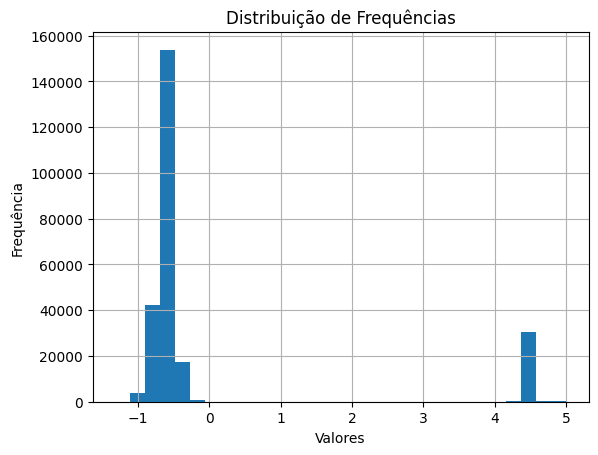

In [11]:
import matplotlib.pyplot as plt
df_arquivo_01_csv['TS'].hist(bins=30)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências')
plt.show()

In [12]:
df_arquivo_01_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TS      250000 non-null  float64
 1   UBA_01  250000 non-null  float64
 2   UBA_02  250000 non-null  float64
 3   UBA_03  250000 non-null  float64
 4   OBA_01  250000 non-null  float64
 5   OBA_02  250000 non-null  float64
 6   OBA_03  250000 non-null  float64
 7   MIC     250000 non-null  float64
dtypes: float64(8)
memory usage: 15.3 MB


In [13]:
df_arquivo_01_csv.isnull().sum()

TS        0
UBA_01    0
UBA_02    0
UBA_03    0
OBA_01    0
OBA_02    0
OBA_03    0
MIC       0
dtype: int64

In [14]:
df_arquivo_01_csv.corr()

,TS,UBA_01,UBA_02,UBA_03,OBA_01,OBA_02,OBA_03,MIC
TS,1.000000,0.003922,0.116471,-0.071884,0.092069,0.043787,0.011877,-0.010920
UBA_01,0.003922,1.000000,0.446640,0.297291,0.036124,0.016094,0.087737,-0.112417
UBA_02,0.116471,0.446640,1.000000,0.273501,0.077391,0.050768,0.116031,-0.657123
UBA_03,-0.071884,0.297291,0.273501,1.000000,0.064715,0.031038,0.026294,-0.289000
OBA_01,0.092069,0.036124,0.077391,0.064715,1.000000,0.227160,0.735330,-0.041249
OBA_02,0.043787,0.016094,0.050768,0.031038,0.227160,1.000000,0.203539,-0.030873
OBA_03,0.011877,0.087737,0.116031,0.026294,0.735330,0.203539,1.000000,-0.065529
MIC,-0.010920,-0.112417,-0.657123,-0.289000,-0.041249,-0.030873,-0.065529,1.000000


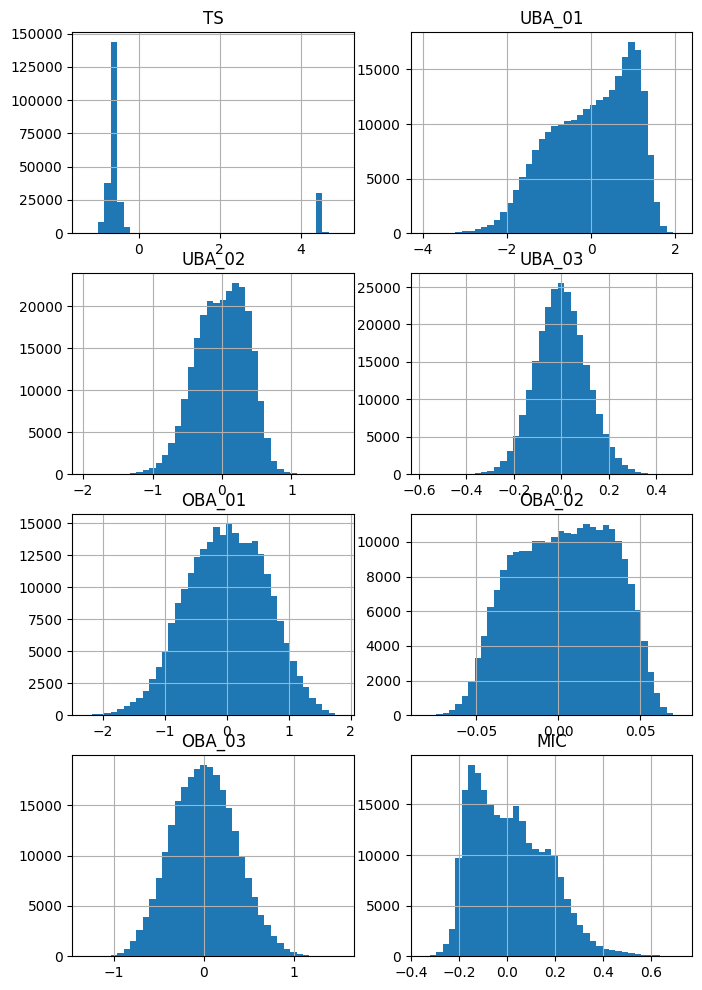

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 12))
axes = axes.flatten()
for i, col in enumerate(df_arquivo_01_csv.columns[:8]):  # Limitando às primeiras 9 colunas
    df_arquivo_01_csv[col].hist(ax=axes[i], bins=40)
    axes[i].set_title(col)

#df_arquivo_01_csv.hist()
plt.show()

### Abordando o problema de forma não supervisionada:

- Uso de autoencoder tanto no SBM como no AAKR, adapatados para funcionar como modelos de aprendizado não supervisionado. Prevendo padrões ou anomalias nos dados (análise auto-associativa):

In [16]:
df = df_arquivo_01_csv

X = df[['TS', 'UBA_01', 'UBA_02', 'UBA_03', 'OBA_01', 'OBA_02', 'OBA_03', 'MIC']]

In [17]:
# Exemplo de dados para X (substitua pelos seus dados reais)
X = np.random.rand(220000, 1)  # Exemplo de 1000 amostras, 1 característica

X = X.reshape((-1, 1))

# Separação desenvolvimento (30) e teste (70)
X_dev, X_test = train_test_split(X, test_size=0.8, random_state=42)

# Separação treino (80) e validação (20) - Hold-out
X_train, X_val, = train_test_split(X_dev, test_size=0.8, random_state=42)

# Normalizando dados para treino, validação e teste
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Exibir as formas dos conjuntos de dados
print("Shape do conjunto de treino:", X_train.shape)
print("Shape do conjunto de validação:", X_val.shape)
print("Shape do conjunto de teste:", X_test.shape)

Shape do conjunto de treino: (8800, 1)
Shape do conjunto de validação: (35200, 1)
Shape do conjunto de teste: (176000, 1)


In [25]:
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Dense, Dropout

# Autoencoder simples para SBM
def create_sbm_autoencoder(input_shape):
    model = tf.keras.Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.50),  # Dropout após a primeira camada
        Dense(32, activation='relu'),  # Encoder
        Dropout(0.50),  # Dropout após o Encoder
        Dense(64, activation='relu'),  # Decoder
        Dropout(0.50),  # Dropout após o Decoder
        #Dense(input_shape)  # Saída de mesma dimensão que a entrada
        Dense(input_shape,)
    ])
    model.compile(optimizer='adam', loss='mse')  # Usar MAE para medir o erro
    return model


In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
def create_aakr_autoencoder(input_shape):
    model = tf.keras.Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Encoder
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Decoder
        Dropout(0.5),
        Dense(input_shape, kernel_regularizer=l2(0.01))  # Saída de mesma dimensão que a entrada
    ])
    create_aakr_autoencoder.compile(optimizer='adam', loss='mse')  # Usar MSE para medir o erro
    return model

In [26]:
# Função para aplicar o AAKR (Auto-Associative Kernel Regression)
def apply_aakr(X_train, X_test, kernel='rbf'):
    # Definir o modelo AAKR usando Kernel Ridge Regression
    aakr_model = KernelRidge(kernel=kernel)
    
    # Treinar o modelo AAKR no conjunto de treino
    aakr_model.fit(X_train, X_train)
    
    # Fazer previsões para o conjunto de teste
    X_pred_aakr = aakr_model.predict(X_test)
    
    # Calcular erro de reconstrução do AAKR
    aakr_value = mean_squared_error(X_test, X_pred_aakr)
    return X_pred_aakr, aakr_value

In [27]:
# Callback personalizado para acompanhar a acurácia
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        accuracy = 1 - loss
        val_accuracy = 1 - val_loss
        print(f"Epoch {epoch+1}: Perda Treinamento: {loss:.4f}, Acurácia Treinamento: {accuracy:.4f}, Perda Validação: {val_loss:.4f}, Acurácia Validação: {val_accuracy:.4f}")
        
        

# Criar o autoencoder e atribuir à variável 'sbm_autoencoder'
sbm_autoencoder = create_sbm_autoencoder(X_train.shape[1])

# Exibir o sumário do modelo
sbm_autoencoder.summary()

c:\Users\Carlos Carneiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

- A acurácia de um autoencoder geralmente é medida com base no erro de reconstrução:

In [28]:

# Treinar o modelo SBM e armazenar o histórico de treinamento
history = sbm_autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_val, X_val),
    callbacks=[AccuracyCallback()],  # "AccuracyCallback" com 'C' maiúsculo
    verbose=1
)

#Treinamento AAKR:

history = aakr_autoencoder.fit(
    X_train, X_train,
    epochs=20,  # Reduzir número de épocas
    batch_size=64,  # Diminuir tamanho do batch
    validation_data=(X_val, X_val),
    callbacks=[AccuracyCallback()],
    verbose=1
)

# Fazer previsões com o Autoencoder SBM
X_pred_sbm = sbm_autoencoder.predict(X_test)
sbm_value = np.mean(np.abs(X_test - X_pred_sbm))  # Erro médio absoluto como SBM

# Calcular "acurácia" inversamente proporcional ao erro de reconstrução (quanto menor o erro, melhor a acurácia)
accuracy = 1 - sbm_value

# Aplicar o AAKR e calcular o erro
X_pred_aakr, aakr_value = apply_aakr(X_train, X_test)
X_pred_sbm = sbm_autoencoder.predict(X_test)
sbm_value = np.mean(np.abs(X_test - X_pred_sbm))  # Erro médio absoluto como SBM

# Calcular acurácias
accuracy_sbm = 1 - sbm_value
accuracy_aakr = 1 - aakr_value



Epoch 1/50
61/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1348Epoch 1: Perda Treinamento: 0.0841, Acurácia Treinamento: 0.9159, Perda Validação: 0.0285, Acurácia Validação: 0.9715
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1285 - val_loss: 0.0285
Epoch 2/50
50/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0400Epoch 2: Perda Treinamento: 0.0364, Acurácia Treinamento: 0.9636, Perda Validação: 0.0182, Acurácia Validação: 0.9818
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - val_loss: 0.0182
Epoch 3/50
54/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316Epoch 3: Perda Treinamento: 0.0306, Acurácia Treinamento: 0.9694, Perda Validação: 0.0242, Acurácia Validação: 0.9758
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0314 - val_loss: 0.0242
Epoch 4/50
52/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0276Epoch 4: Perda Treinamento: 0.0266, Acurácia Treinamento: 0.9734, Perda Validação: 0.0272, Acurácia Validação: 0.9728
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.027

In [22]:
# Exibir os resultados SBM e AAKR
print('                                      ')
print('---------------------------------------')
print(f"SBM (MSE - Erro de Reconstrução): {sbm_value:.4f}")
#print('                                      ')
#print('---------------------------------------')
print(f"Acurácia SBM (1 - Erro de Reconstrução): {accuracy_sbm:.4f}")
#print('                                      ')
#print('---------------------------------------')
print(f"AAKR (MSE - Erro de Reconstrução): {aakr_value:.4f}")
#print('                                      ')
#print('---------------------------------------')
print(f"Acurácia AAKR (1 - Erro de Reconstrução): {accuracy_aakr:.4f}")
#print('                                      ')
#print('---------------------------------------')

                                      
---------------------------------------
SBM (MSE - Erro de Reconstrução): 0.0371
Acurácia SBM (1 - Erro de Reconstrução): 0.9629
AAKR (MSE - Erro de Reconstrução): 0.0000
Acurácia AAKR (1 - Erro de Reconstrução): 1.0000


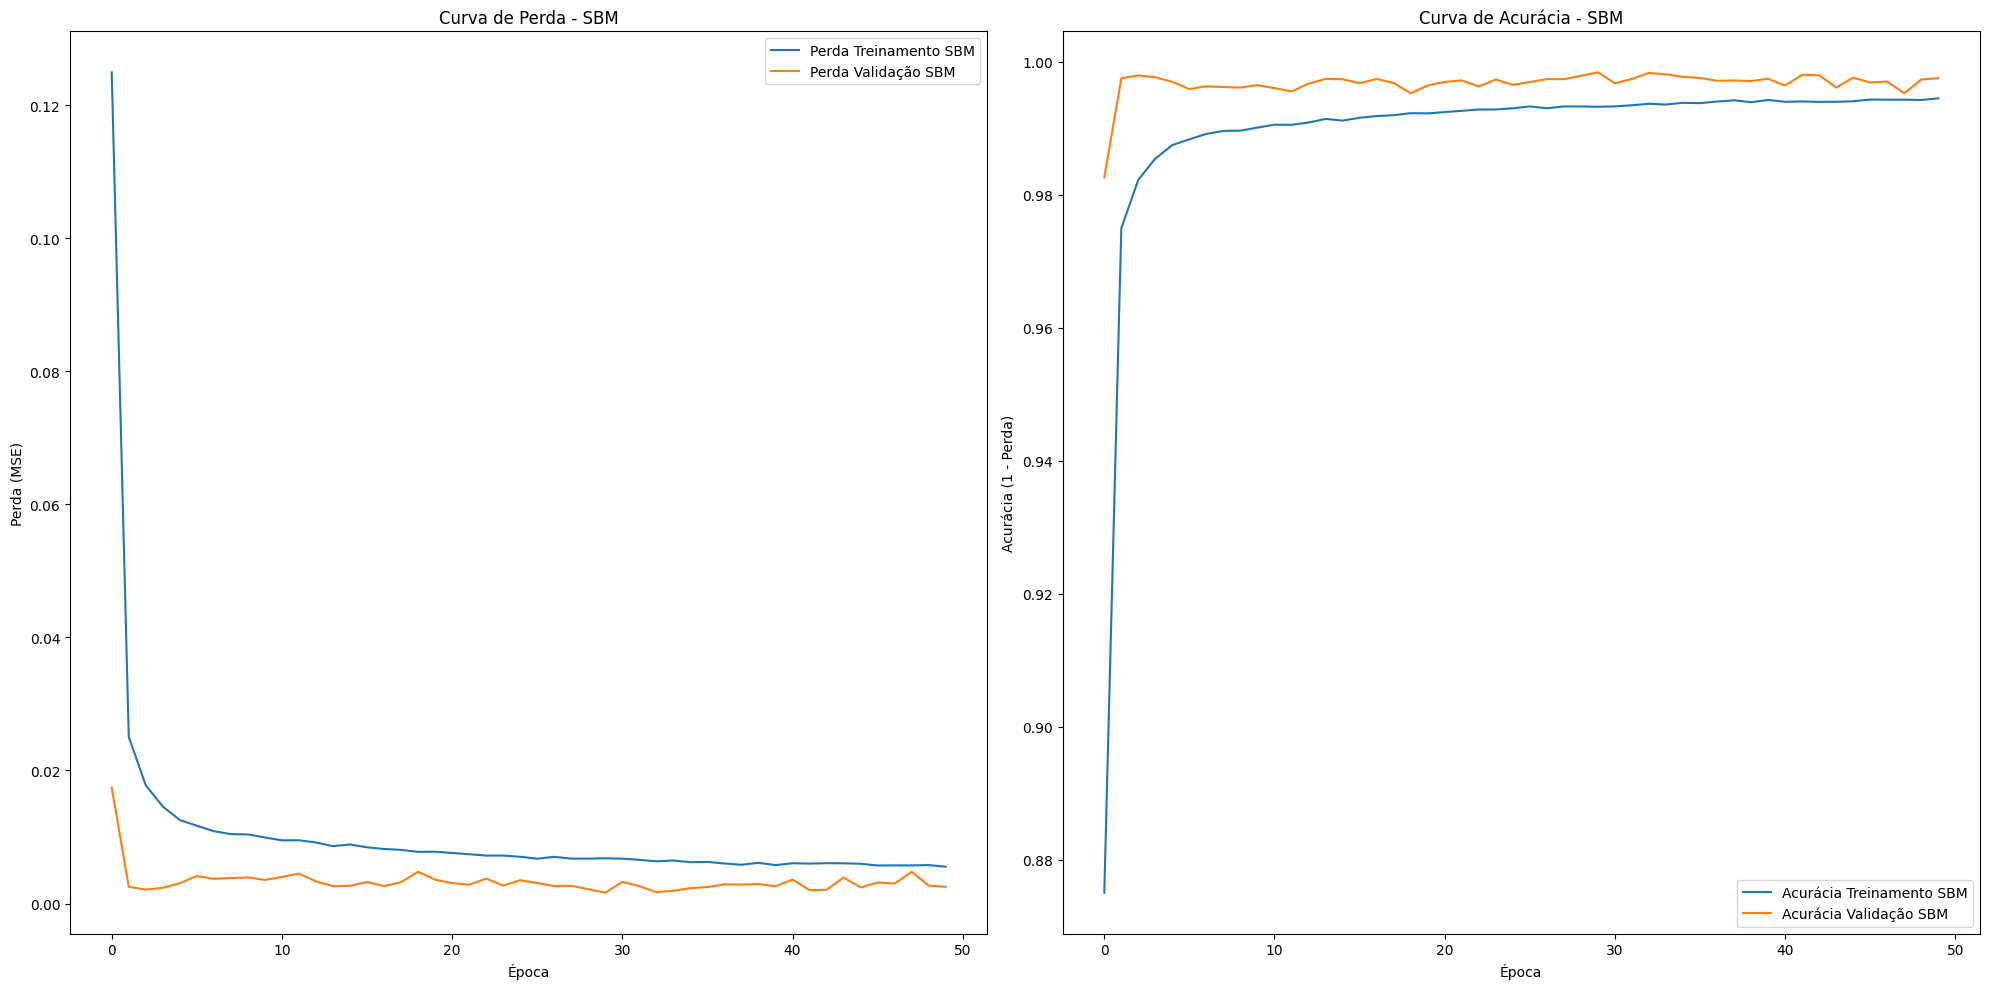

In [23]:
# Plotar gráficos de perda e acurácia
plt.figure(figsize=(20, 10))

# Plotar curvas de perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda Treinamento SBM')
plt.plot(history.history['val_loss'], label='Perda Validação SBM')
plt.title('Curva de Perda - SBM')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()

# Plotar curvas de acurácia
plt.subplot(1, 2, 2)
plt.plot([1 - x for x in history.history['loss']], label='Acurácia Treinamento SBM')  # Inverso da perda como acurácia
plt.plot([1 - x for x in history.history['val_loss']], label='Acurácia Validação SBM')  # Inverso da perda como acurácia
plt.title('Curva de Acurácia - SBM')
plt.xlabel('Época')
plt.ylabel('Acurácia (1 - Perda)')
plt.legend()

plt.tight_layout()
plt.show()

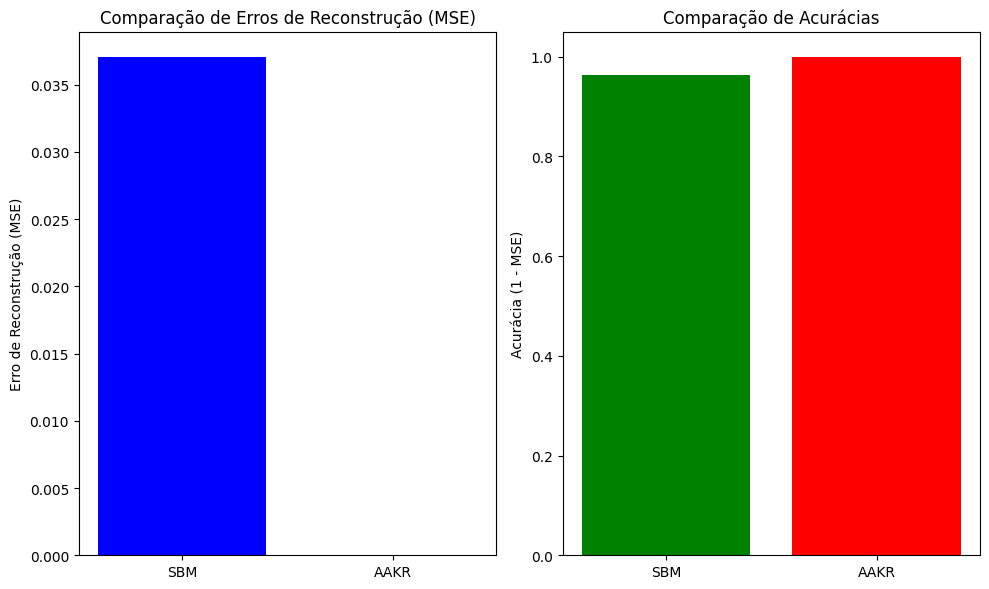

In [24]:
# Verificando valores calculados
if sbm_value is None or aakr_value is None:
    print("Erro ao calcular SBM ou AAKR!")
else:
    # Gráficos de comparação SBM e AAKR
    plt.figure(figsize=(10, 6))

    # Gráfico de barras comparando os erros (MSE) de SBM e AAKR
    plt.subplot(1, 2, 1)
    plt.bar(['SBM', 'AAKR'], [sbm_value, aakr_value], color=['blue', 'orange'])
    plt.title('Comparação de Erros de Reconstrução (MSE)')
    plt.ylabel('Erro de Reconstrução (MSE)')

    # Gráfico de barras comparando as acurácias de SBM e AAKR
    plt.subplot(1, 2, 2)
    plt.bar(['SBM', 'AAKR'], [accuracy_sbm, accuracy_aakr], color=['green', 'red'])
    plt.title('Comparação de Acurácias')
    plt.ylabel('Acurácia (1 - MSE)')

    plt.tight_layout()
    plt.show()

In [ ]:
# Gráfico de perda e acurácia
plt.figure(figsize=(20, 5))

# Plotar as curvas de perda para o SBM
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda Treinamento SBM')
plt.plot(history.history['val_loss'], label='Perda Validação SBM')
plt.title('Curva de Perda - SBM')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()